# Topics: K - Means, LDA, Logit, NMDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data Files


In [2]:
df = pd.read_csv('admission2_mod.csv')
out_of_sample = pd.read_csv('hold_out_sample.csv')

In [3]:
# converting the admit status into boolean
df['De']=df['De']=='admit'


In [4]:
df.head(5)

,GPA,GMAT,De
0,2.13,408,False
1,2.19,411,False
2,2.20,474,False
3,2.31,505,False
4,2.35,321,False


In [5]:
out_of_sample.head(5)

,GPA,GMAT,admit
0,2.96,596,True
1,3.14,473,False
2,3.22,482,True
3,3.29,527,True
4,3.69,505,True


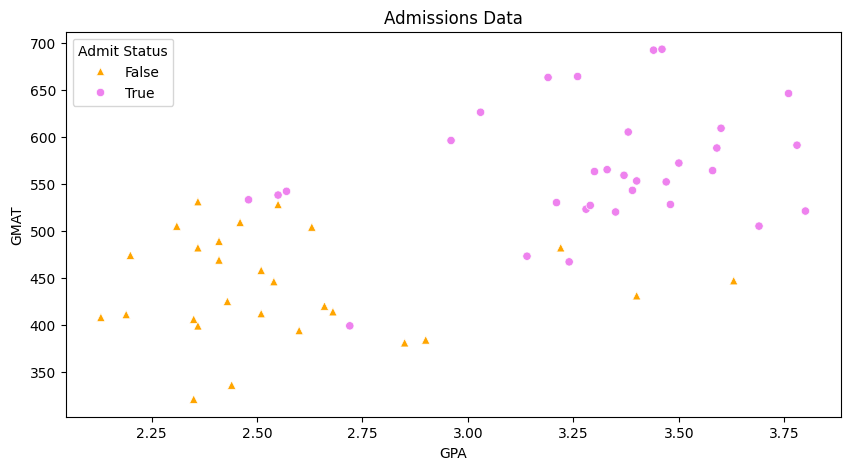

In [6]:
# plot for admissions data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='De', style='De', markers=['^', 'o'], palette=['orange', 'violet'])
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Admissions Data")
plt.legend(title='Admit Status')
plt.show()

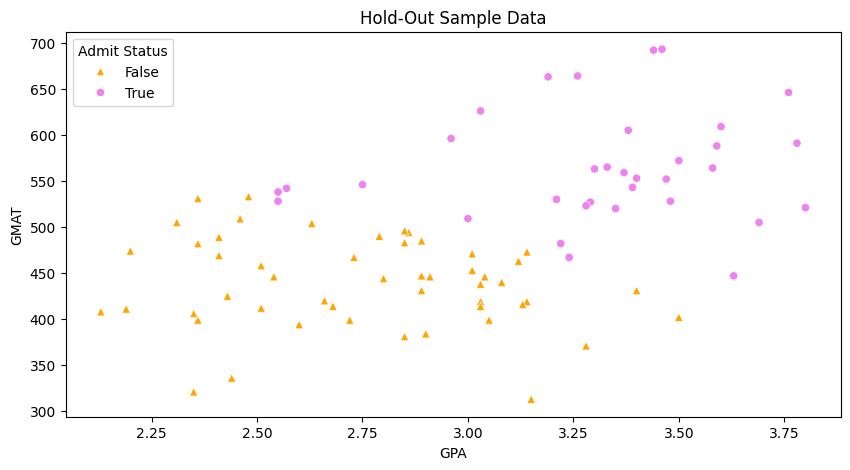

In [7]:
# plot hold out sample data

plt.figure(figsize=(10, 5))
sns.scatterplot(data=out_of_sample, x='GPA', y='GMAT', hue='admit', style='admit', markers=['^', 'o'], palette=['orange', 'violet'])
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Hold-Out Sample Data")
plt.legend(title='Admit Status')
plt.show()

# K-Means Clustering

## K - Means Without Scaling

### K-Means: 2 Clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df[['GPA', 'GMAT']])
df['Cluster'] = kmeans2.labels_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


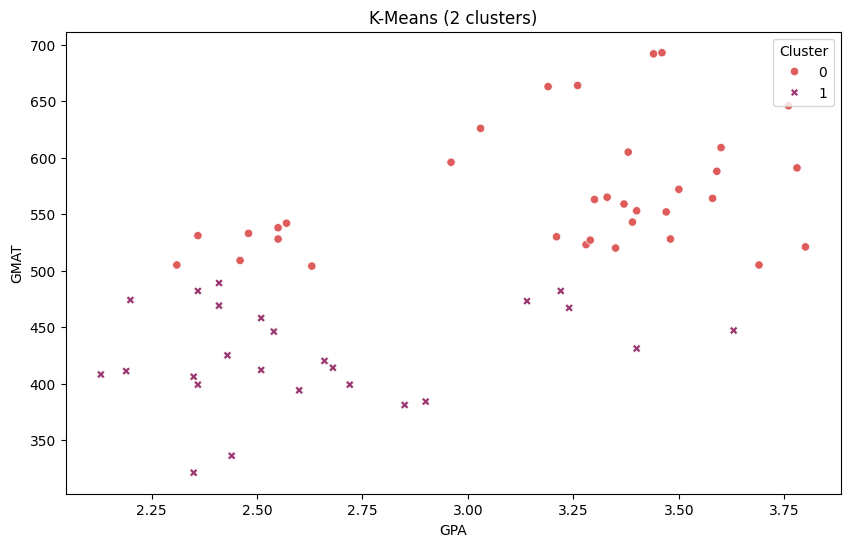

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K-Means: 3 Clusters


In [11]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(df[['GPA', 'GMAT']])
df['Cluster'] = kmeans3.labels_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


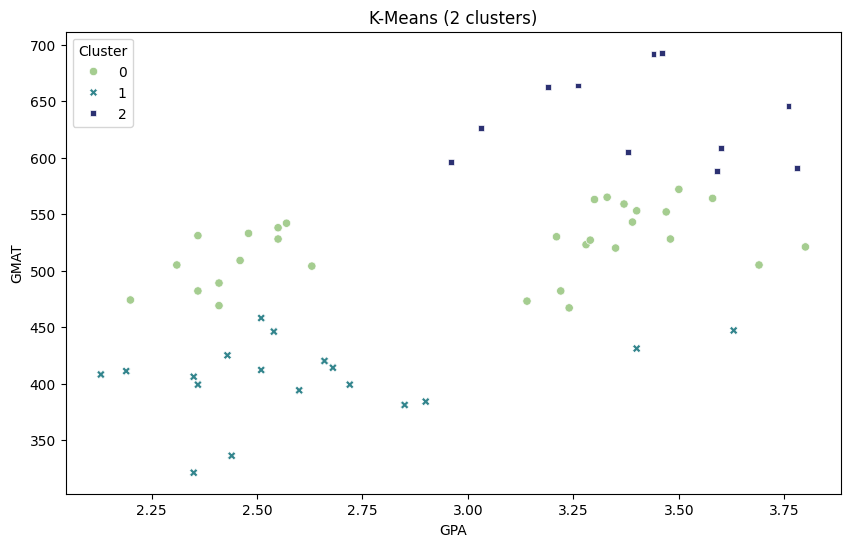

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='crest')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (2 clusters)')
plt.legend(title='Cluster')
plt.show()

## K - Means With Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [16]:
# creating another dataframe with same values as dataframe inorder to preserve the original dataframe
df_norm = df.copy()

In [17]:
# Scaling the data in df_norm
scaler = StandardScaler()
df_norm[['GPA', 'GMAT']] = scaler.fit_transform(df_norm[['GPA', 'GMAT']])

### K - Means with 2 clusters

In [18]:
# Creating a K-means model with 2 clusters on scaled data

kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(df_norm[['GPA', 'GMAT']])
df['Cluster'] = kmeans_2.labels_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


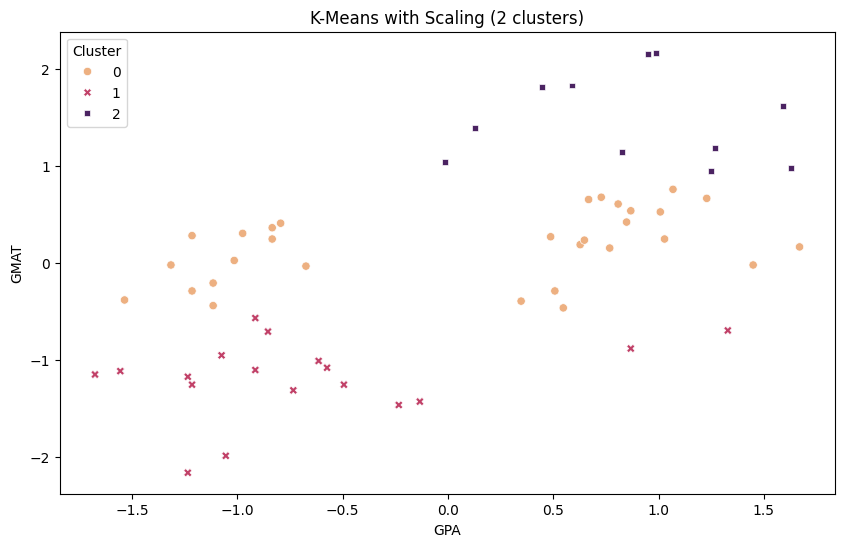

In [19]:
# plot to visulaise the K-means with 3 clusers on scaled data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_norm, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K - Means with 3 Clusters

In [20]:
# Creating a K-means model with 3 clusters on scaled data
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(df_norm[['GPA', 'GMAT']])
df['Cluster'] = kmeans_3.labels_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


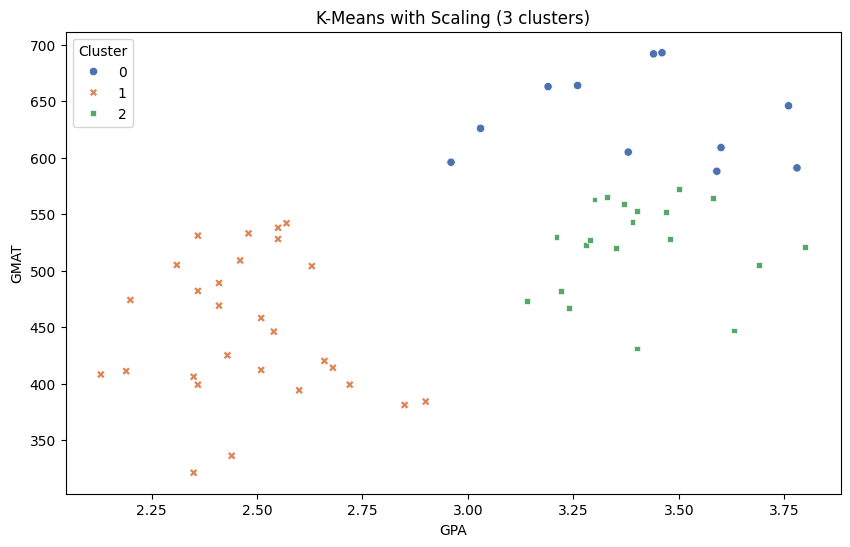

In [21]:
# plot to visulaise the K-means with 3 clusers on scaled data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='deep')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (3 clusters)')
plt.legend(title='Cluster')
plt.show()

# Linear Discriminant Analysis (LDA) 